In [13]:
import pandas, numpy
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [14]:
# To Know what backend is keras's using NOW!
'''
General, keras's backends are Google Tensorflow, 
Microsoft CNTK (Cognitive toolkit), Theano (University of Montreal)
'''
keras.backend.backend()

'tensorflow'

In [15]:
tf.__version__

'2.0.0'

In [16]:
## Zolando Article Images
## Reference - https://github.com/zalandoresearch/fashion-mnist
(train_images, train_labels), \
    (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [17]:
print(f" Training Images Count: {len(train_images)}")
print(f" Testing Images Count: {len(test_images)}")

 Training Images Count: 60000
 Testing Images Count: 10000


In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Showing 1s Training Image Data in Arrays
train_images[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [19]:
## Normalize The Dataset => All values will fall from 0 to 1 
train_images = train_images / 255
test_images = test_images / 255

In [20]:
## Showing 1s Training Image Data in Arrays
train_images[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.24705882, 0.10980392, 0.        , 0.        ,
        0.        , 0.12941176, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.10980392, 0.49411765,
        0.94509804, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.98823529, 0.97254902, 0.43529412,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.80784314, 0.95686275, 0.98431373,
        0.94509804, 0.90196078, 0.93333333, 0.86666667, 0.80392157,
        0.90196078, 0.9411

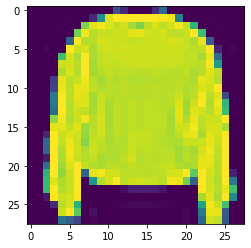

In [21]:
## Showing 1st Training Image Data using matplotlib
plt.imshow( train_images[7] )
#plt.imshow( train_images[7], cmap = plt.cm.binary ) # for black/white
plt.show()

In [22]:
'''
Keras Sequential contains Input Layer, Hidden Layers, Output Layer.
- Flatten means Converting 28x28 array (784) into single list.
- Dense means Fully Connected Layer. 128 - hidden layer neurons. 10 - output
- Softmax: distributing set of numbers to probability of available classes.
'''

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [24]:
'''
Training the Model
- Optimizer: algorithm to adjust weight of edges for training dataset.
- Epochs means iteration of Training the Model, it also randomly pick 
  trained images/labels & feed to neural networks.
'''

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4953 - accuracy: 0.8274
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3741 - accuracy: 0.8659
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3380 - accuracy: 0.8766
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3140 - accuracy: 0.8845
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2965 - accuracy: 0.8913


In [25]:
## Calculate Validation Loss
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(f"Loss: { round(val_loss * 100, 2) } %")
print(f"Accuracy: { round(val_acc * 100, 2) } %")

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss: 34.12 %
Accuracy: 87.78 %


In [26]:
## Prediction of Trained Neural Network Model
predictions = model.predict(test_images)

predictions[7]

array([1.1542379e-05, 3.0277334e-08, 2.3325135e-03, 3.2358777e-05,
       3.8863771e-02, 1.0278980e-06, 9.5875633e-01, 1.7068145e-09,
       2.4493791e-06, 1.5713538e-09], dtype=float32)

In [31]:
print(f" Max out of list (7th Prediction): {numpy.argmax(predictions[0])}")
print(f"\n Image Name: { class_names[numpy.argmax(predictions[0])] }")

 Max out of list (7th Prediction): 9

 Image Name: Ankle boot


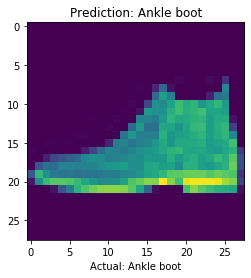

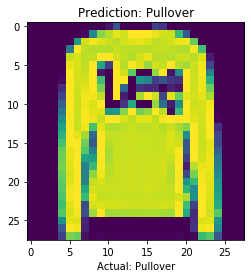

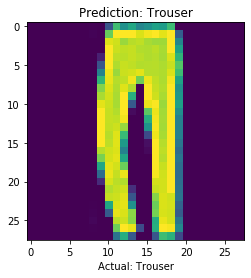

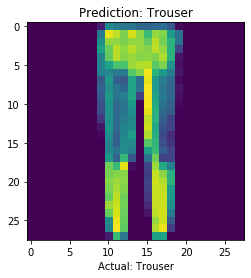

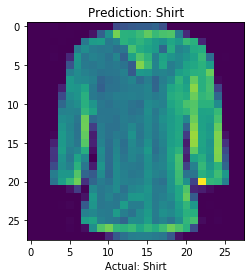

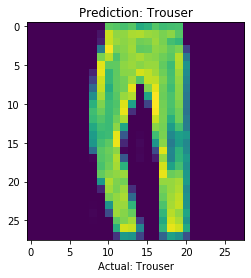

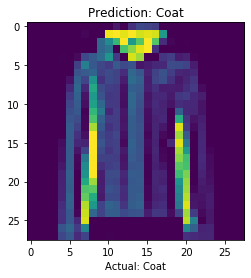

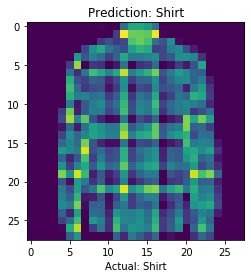

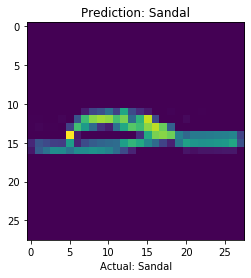

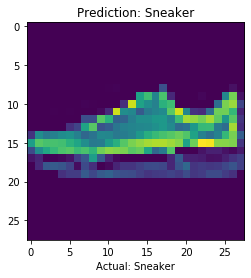

In [33]:
for i in range(len(class_names)):
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f"Actual: { class_names[test_labels[i]] }")
    plt.title(f"Prediction: { class_names[numpy.argmax(predictions[i])] }")
    plt.show()